### aim: Visualize all GCB outputs, check for holes and compare with last year's

Here is a list of all things requested, first column is variableID (added by TJ to have a clear sequential catalog of the demands)

https://docs.google.com/spreadsheets/d/1EUf1SV671k1wtSX4ccQ3CnOmnQMrtfcvsIs1SSyOzh4/edit?usp=sharing

    Dave's directory, 2022 submission: 
    
        `/gpfs/data/greenocean/GCB/GCB_RECCAP/2022submission`

    My directories, 2023-4, this year's submission:
    
        `/gpfs/data/greenocean/GCB/GCB2023/submissionData2023`
        `/gpfs/data/greenocean/GCB/GCB2024/submissionData2024`
        
A similiar notebook is in the 2023 github!

In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [19]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [20]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## flux timeseries VarID 1-6 (key flag -1)

(also comparing with TOM12)
(note submission data script adjusted from last year's to have units in pGC/yr)

    1	fgco2_glob
    2	fgco2_reg
    3	intDIC_1994_glob
    4	intDIC_1994_reg
    5	intDIC_2007_glob
    6	intDIC_2007_reg
    


Text(0.5, 1.0, 'north (3- 90), pG/yr')

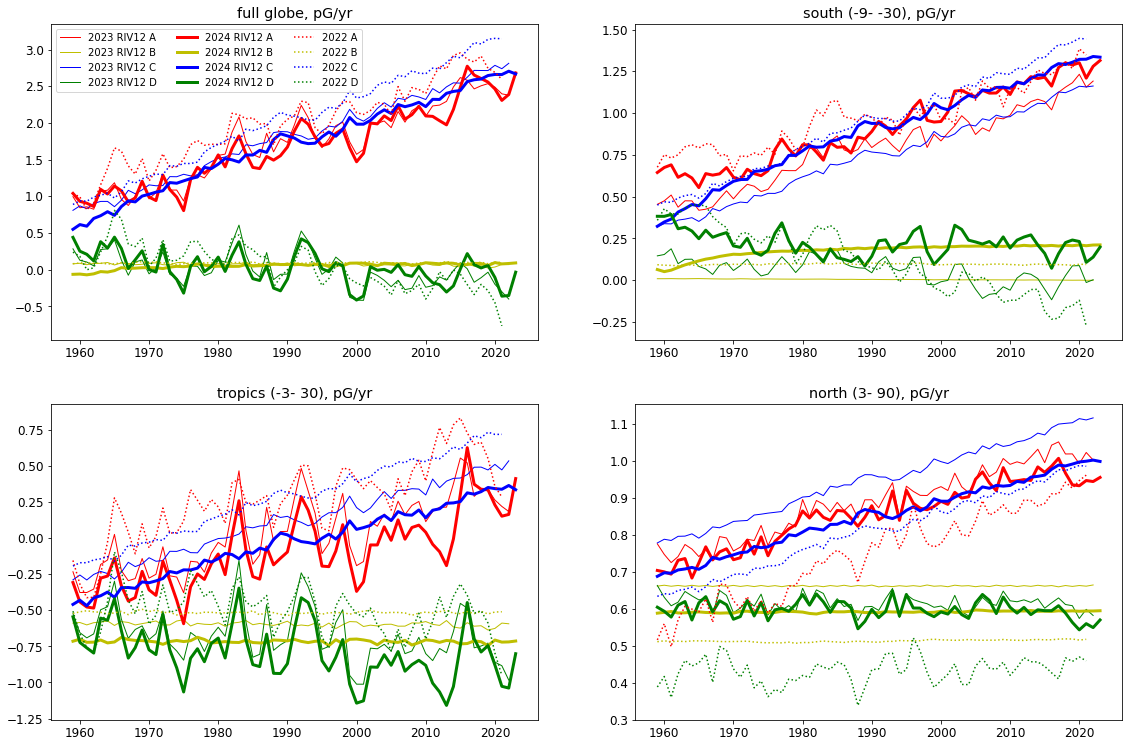

In [21]:
DWdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/GCB2022_inttime/' #dave 2022
TJdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/'# RIV12 2023
TJ24dir = '/gpfs/data/greenocean/GCB/GCB2024/submissionData2024/RIV12_R4A-D0/Tier1' # RIV12 2024


TJ_tfil_A = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_A_*1959-2022_*.nc')[0])
TJ_tfil_B = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_B_*1959-2022_*.nc')[0])
TJ_tfil_C = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_C_*1959-2022_*.nc')[0])
TJ_tfil_D = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_D_*1959-2022_*.nc')[0])

DW_tfil_A = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_A_*1959-2022_*.nc')[0])
DW_tfil_B = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_B_*1959-2022_*.nc')[0])
DW_tfil_C = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_C_*1959-2022_*.nc')[0])
DW_tfil_D = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_D_*1959-2022_*.nc')[0])

TJ24_tfil_A = xr.open_dataset(glob.glob(f'{TJ24dir}/integrated_timelines_PlankTOM_A_*1959-2023_*.nc')[0])
TJ24_tfil_B = xr.open_dataset(glob.glob(f'{TJ24dir}/integrated_timelines_PlankTOM_B_*1959-2023_*.nc')[0])
TJ24_tfil_C = xr.open_dataset(glob.glob(f'{TJ24dir}/integrated_timelines_PlankTOM_C_*1959-2023_*.nc')[0])
TJ24_tfil_D = xr.open_dataset(glob.glob(f'{TJ24dir}/integrated_timelines_PlankTOM_D_*1959-2023_*.nc')[0])

TJ_tfil_A_yrly = TJ_tfil_A.groupby('TIME.year').mean()
TJ_tfil_B_yrly = TJ_tfil_B.groupby('TIME.year').mean()
TJ_tfil_C_yrly = TJ_tfil_C.groupby('TIME.year').mean()
TJ_tfil_D_yrly = TJ_tfil_D.groupby('TIME.year').mean()

DW_tfil_A_yrly = DW_tfil_A.groupby('TIME.year').mean()
DW_tfil_B_yrly = DW_tfil_B.groupby('TIME.year').mean()
DW_tfil_C_yrly = DW_tfil_C.groupby('TIME.year').mean()
DW_tfil_D_yrly = DW_tfil_D.groupby('TIME.year').mean()

TJ24_tfil_A_yrly = TJ24_tfil_A.groupby('TIME.year').mean()
TJ24_tfil_B_yrly = TJ24_tfil_B.groupby('TIME.year').mean()
TJ24_tfil_C_yrly = TJ24_tfil_C.groupby('TIME.year').mean()
TJ24_tfil_D_yrly = TJ24_tfil_D.groupby('TIME.year').mean()


fact = 1.6
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_glob, color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
axs[0].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_glob, color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
axs[0].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_glob, color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
axs[0].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_glob, color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

axs[0].plot(TJ24_tfil_A_yrly.year, TJ24_tfil_A_yrly.fgco2_glob, color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
axs[0].plot(TJ24_tfil_B_yrly.year, TJ24_tfil_B_yrly.fgco2_glob, color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
axs[0].plot(TJ24_tfil_C_yrly.year, TJ24_tfil_C_yrly.fgco2_glob, color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
axs[0].plot(TJ24_tfil_D_yrly.year, TJ24_tfil_D_yrly.fgco2_glob, color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)

axs[0].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_glob, color = 'r', label = '2022 A', linestyle = ':')
axs[0].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_glob, color = 'y', label = '2022 B', linestyle = ':')
axs[0].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_glob, color = 'b', label = '2022 C', linestyle = ':')
axs[0].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_glob, color = 'g', label = '2022 D', linestyle = ':')
axs[0].legend(ncol = 3, fontsize = 10)

##
axs[1].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_reg[:,0], color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
axs[1].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_reg[:,0], color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
axs[1].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_reg[:,0], color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
axs[1].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_reg[:,0], color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

axs[1].plot(TJ24_tfil_A_yrly.year, TJ24_tfil_A_yrly.fgco2_reg[:,0], color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
axs[1].plot(TJ24_tfil_B_yrly.year, TJ24_tfil_B_yrly.fgco2_reg[:,0], color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
axs[1].plot(TJ24_tfil_C_yrly.year, TJ24_tfil_C_yrly.fgco2_reg[:,0], color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
axs[1].plot(TJ24_tfil_D_yrly.year, TJ24_tfil_D_yrly.fgco2_reg[:,0], color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)

axs[1].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_reg[:,0], color = 'r', label = '2022 A', linestyle = ':')
axs[1].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_reg[:,0], color = 'y', label = '2022 B', linestyle = ':')
axs[1].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_reg[:,0], color = 'b', label = '2022 C', linestyle = ':')
axs[1].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_reg[:,0], color = 'g', label = '2022 D', linestyle = ':')

###
axs[2].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_reg[:,1], color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
axs[2].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_reg[:,1], color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
axs[2].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_reg[:,1], color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
axs[2].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_reg[:,1], color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

axs[2].plot(TJ24_tfil_A_yrly.year, TJ24_tfil_A_yrly.fgco2_reg[:,1], color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
axs[2].plot(TJ24_tfil_B_yrly.year, TJ24_tfil_B_yrly.fgco2_reg[:,1], color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
axs[2].plot(TJ24_tfil_C_yrly.year, TJ24_tfil_C_yrly.fgco2_reg[:,1], color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
axs[2].plot(TJ24_tfil_D_yrly.year, TJ24_tfil_D_yrly.fgco2_reg[:,1], color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)

axs[2].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_reg[:,1], color = 'r', label = '2022 A', linestyle = ':')
axs[2].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_reg[:,1], color = 'y', label = '2022 B', linestyle = ':')
axs[2].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_reg[:,1], color = 'b', label = '2022 C', linestyle = ':')
axs[2].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_reg[:,1], color = 'g', label = '2022 D', linestyle = ':')

##
###
axs[3].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_reg[:,2], color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
axs[3].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_reg[:,2], color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
axs[3].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_reg[:,2], color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
axs[3].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_reg[:,2], color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

axs[3].plot(TJ24_tfil_A_yrly.year, TJ24_tfil_A_yrly.fgco2_reg[:,2], color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
axs[3].plot(TJ24_tfil_B_yrly.year, TJ24_tfil_B_yrly.fgco2_reg[:,2], color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
axs[3].plot(TJ24_tfil_C_yrly.year, TJ24_tfil_C_yrly.fgco2_reg[:,2], color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
axs[3].plot(TJ24_tfil_D_yrly.year, TJ24_tfil_D_yrly.fgco2_reg[:,2], color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)

axs[3].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_reg[:,2], color = 'r', label = '2022 A', linestyle = ':')
axs[3].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_reg[:,2], color = 'y', label = '2022 B', linestyle = ':')
axs[3].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_reg[:,2], color = 'b', label = '2022 C', linestyle = ':')
axs[3].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_reg[:,2], color = 'g', label = '2022 D', linestyle = ':')

axs[0].set_title('full globe, pG/yr')
axs[1].set_title('south (-9- -30), pG/yr')
axs[2].set_title('tropics (-3- 30), pG/yr')
axs[3].set_title('north (3- 90), pG/yr')

## Carbon inventory

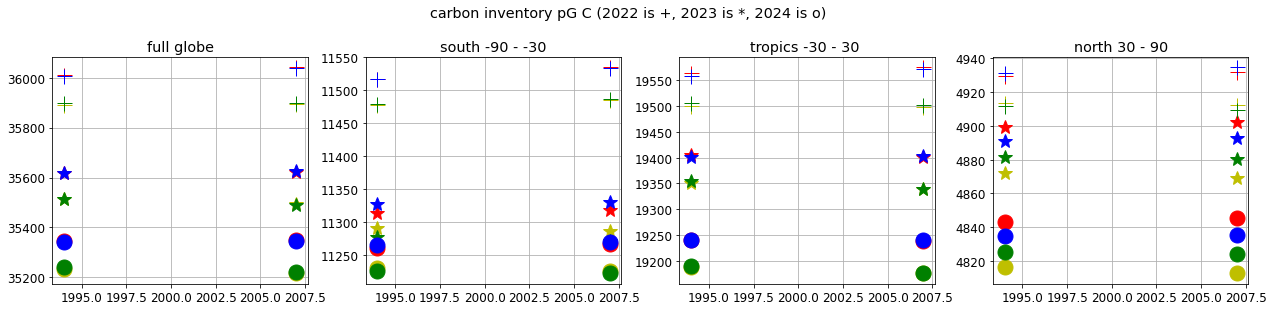

In [22]:
ms = 15
fact = 1.1
fig, axs = plt.subplots(1,4, figsize=(16*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(1994,TJ_tfil_A.intDIC_1994_glob,'r*', markersize = ms, label = '2023 GEA0')
axs[0].plot(1994,TJ_tfil_B.intDIC_1994_glob,'y*', markersize = ms, label = '2023 GEB0')
axs[0].plot(1994,TJ_tfil_C.intDIC_1994_glob,'b*', markersize = ms, label = '2023 GEC0')
axs[0].plot(1994,TJ_tfil_D.intDIC_1994_glob,'g*', markersize = ms, label = '2023 GED0')
axs[0].plot(2007,TJ_tfil_A.intDIC_2007_glob,'r*', markersize = ms)
axs[0].plot(2007,TJ_tfil_B.intDIC_2007_glob,'y*', markersize = ms)
axs[0].plot(2007,TJ_tfil_C.intDIC_2007_glob,'b*', markersize = ms)
axs[0].plot(2007,TJ_tfil_D.intDIC_2007_glob,'g*', markersize = ms)

axs[0].plot(1994,DW_tfil_A.intDIC_1994_glob,'r+', label = '2022 A', markersize = ms)
axs[0].plot(1994,DW_tfil_B.intDIC_1994_glob,'y+', label = '2022 B', markersize = ms)
axs[0].plot(1994,DW_tfil_C.intDIC_1994_glob,'b+', label = '2022 C', markersize = ms)
axs[0].plot(1994,DW_tfil_D.intDIC_1994_glob,'g+', label = '2022 D', markersize = ms)
axs[0].plot(2007,DW_tfil_A.intDIC_2007_glob,'r+', markersize = ms)
axs[0].plot(2007,DW_tfil_B.intDIC_2007_glob,'y+', markersize = ms)
axs[0].plot(2007,DW_tfil_C.intDIC_2007_glob,'b+', markersize = ms)
axs[0].plot(2007,DW_tfil_D.intDIC_2007_glob,'g+', markersize = ms)


#########

axs[1].plot(1994,TJ_tfil_A.intDIC_1994_reg[0],'r*', markersize = ms)
axs[1].plot(1994,TJ_tfil_B.intDIC_1994_reg[0],'y*', markersize = ms)
axs[1].plot(1994,TJ_tfil_C.intDIC_1994_reg[0],'b*', markersize = ms)
axs[1].plot(1994,TJ_tfil_D.intDIC_1994_reg[0],'g*', markersize = ms)
axs[1].plot(2007,TJ_tfil_A.intDIC_2007_reg[0],'r*', markersize = ms)
axs[1].plot(2007,TJ_tfil_B.intDIC_2007_reg[0],'y*', markersize = ms)
axs[1].plot(2007,TJ_tfil_C.intDIC_2007_reg[0],'b*', markersize = ms)
axs[1].plot(2007,TJ_tfil_D.intDIC_2007_reg[0],'g*', markersize = ms)

axs[1].plot(1994,DW_tfil_A.intDIC_1994_reg[0],'r+', markersize = ms)
axs[1].plot(1994,DW_tfil_B.intDIC_1994_reg[0],'y+', markersize = ms)
axs[1].plot(1994,DW_tfil_C.intDIC_1994_reg[0],'b+', markersize = ms)
axs[1].plot(1994,DW_tfil_D.intDIC_1994_reg[0],'g+', markersize = ms)
axs[1].plot(2007,DW_tfil_A.intDIC_2007_reg[0],'r+', markersize = ms)
axs[1].plot(2007,DW_tfil_B.intDIC_2007_reg[0],'y+', markersize = ms)
axs[1].plot(2007,DW_tfil_C.intDIC_2007_reg[0],'b+', markersize = ms)
axs[1].plot(2007,DW_tfil_D.intDIC_2007_reg[0],'g+', markersize = ms)

axs[2].plot(1994,TJ_tfil_A.intDIC_1994_reg[1],'r*', markersize = ms)
axs[2].plot(1994,TJ_tfil_B.intDIC_1994_reg[1],'y*', markersize = ms)
axs[2].plot(1994,TJ_tfil_C.intDIC_1994_reg[1],'b*', markersize = ms)
axs[2].plot(1994,TJ_tfil_D.intDIC_1994_reg[1],'g*', markersize = ms)
axs[2].plot(2007,TJ_tfil_A.intDIC_2007_reg[1],'r*', markersize = ms)
axs[2].plot(2007,TJ_tfil_B.intDIC_2007_reg[1],'y*', markersize = ms)
axs[2].plot(2007,TJ_tfil_C.intDIC_2007_reg[1],'b*', markersize = ms)
axs[2].plot(2007,TJ_tfil_D.intDIC_2007_reg[1],'g*', markersize = ms)

axs[2].plot(1994,DW_tfil_A.intDIC_1994_reg[1],'r+', markersize = ms)
axs[2].plot(1994,DW_tfil_B.intDIC_1994_reg[1],'y+', markersize = ms)
axs[2].plot(1994,DW_tfil_C.intDIC_1994_reg[1],'b+', markersize = ms)
axs[2].plot(1994,DW_tfil_D.intDIC_1994_reg[1],'g+', markersize = ms)
axs[2].plot(2007,DW_tfil_A.intDIC_2007_reg[1],'r+', markersize = ms)
axs[2].plot(2007,DW_tfil_B.intDIC_2007_reg[1],'y+', markersize = ms)
axs[2].plot(2007,DW_tfil_C.intDIC_2007_reg[1],'b+', markersize = ms)
axs[2].plot(2007,DW_tfil_D.intDIC_2007_reg[1],'g+', markersize = ms)

axs[3].plot(1994,TJ_tfil_A.intDIC_1994_reg[2],'r*', markersize = ms)
axs[3].plot(1994,TJ_tfil_B.intDIC_1994_reg[2],'y*', markersize = ms)
axs[3].plot(1994,TJ_tfil_C.intDIC_1994_reg[2],'b*', markersize = ms)
axs[3].plot(1994,TJ_tfil_D.intDIC_1994_reg[2],'g*', markersize = ms)
axs[3].plot(2007,TJ_tfil_A.intDIC_2007_reg[2],'r*', markersize = ms)
axs[3].plot(2007,TJ_tfil_B.intDIC_2007_reg[2],'y*', markersize = ms)
axs[3].plot(2007,TJ_tfil_C.intDIC_2007_reg[2],'b*', markersize = ms)
axs[3].plot(2007,TJ_tfil_D.intDIC_2007_reg[2],'g*', markersize = ms)

axs[3].plot(1994,DW_tfil_A.intDIC_1994_reg[2],'r+', markersize = ms)
axs[3].plot(1994,DW_tfil_B.intDIC_1994_reg[2],'y+', markersize = ms)
axs[3].plot(1994,DW_tfil_C.intDIC_1994_reg[2],'b+', markersize = ms)
axs[3].plot(1994,DW_tfil_D.intDIC_1994_reg[2],'g+', markersize = ms)
axs[3].plot(2007,DW_tfil_A.intDIC_2007_reg[2],'r+', markersize = ms)
axs[3].plot(2007,DW_tfil_B.intDIC_2007_reg[2],'y+', markersize = ms)
axs[3].plot(2007,DW_tfil_C.intDIC_2007_reg[2],'b+', markersize = ms)
axs[3].plot(2007,DW_tfil_D.intDIC_2007_reg[2],'g+', markersize = ms)


axs[0].plot(1994,TJ24_tfil_A.intDIC_1994_glob,'ro', markersize = ms, label = '2024 A')
axs[0].plot(1994,TJ24_tfil_B.intDIC_1994_glob,'yo', markersize = ms, label = '2024 B')
axs[0].plot(1994,TJ24_tfil_C.intDIC_1994_glob,'bo', markersize = ms, label = '2024 C')
axs[0].plot(1994,TJ24_tfil_D.intDIC_1994_glob,'go', markersize = ms, label = '2024 D')
axs[0].plot(2007,TJ24_tfil_A.intDIC_2007_glob,'ro', markersize = ms)
axs[0].plot(2007,TJ24_tfil_B.intDIC_2007_glob,'yo', markersize = ms)
axs[0].plot(2007,TJ24_tfil_C.intDIC_2007_glob,'bo', markersize = ms)
axs[0].plot(2007,TJ24_tfil_D.intDIC_2007_glob,'go', markersize = ms)

axs[1].plot(1994,TJ24_tfil_A.intDIC_1994_reg[0],'ro', markersize = ms)
axs[1].plot(1994,TJ24_tfil_B.intDIC_1994_reg[0],'yo', markersize = ms)
axs[1].plot(1994,TJ24_tfil_C.intDIC_1994_reg[0],'bo', markersize = ms)
axs[1].plot(1994,TJ24_tfil_D.intDIC_1994_reg[0],'go', markersize = ms)
axs[1].plot(2007,TJ24_tfil_A.intDIC_2007_reg[0],'ro', markersize = ms)
axs[1].plot(2007,TJ24_tfil_B.intDIC_2007_reg[0],'yo', markersize = ms)
axs[1].plot(2007,TJ24_tfil_C.intDIC_2007_reg[0],'bo', markersize = ms)
axs[1].plot(2007,TJ24_tfil_D.intDIC_2007_reg[0],'go', markersize = ms)

axs[2].plot(1994,TJ24_tfil_A.intDIC_1994_reg[1],'ro', markersize = ms)
axs[2].plot(1994,TJ24_tfil_B.intDIC_1994_reg[1],'yo', markersize = ms)
axs[2].plot(1994,TJ24_tfil_C.intDIC_1994_reg[1],'bo', markersize = ms)
axs[2].plot(1994,TJ24_tfil_D.intDIC_1994_reg[1],'go', markersize = ms)
axs[2].plot(2007,TJ24_tfil_A.intDIC_2007_reg[1],'ro', markersize = ms)
axs[2].plot(2007,TJ24_tfil_B.intDIC_2007_reg[1],'yo', markersize = ms)
axs[2].plot(2007,TJ24_tfil_C.intDIC_2007_reg[1],'bo', markersize = ms)
axs[2].plot(2007,TJ24_tfil_D.intDIC_2007_reg[1],'go', markersize = ms)

axs[3].plot(1994,TJ24_tfil_A.intDIC_1994_reg[2],'ro', markersize = ms)
axs[3].plot(1994,TJ24_tfil_B.intDIC_1994_reg[2],'yo', markersize = ms)
axs[3].plot(1994,TJ24_tfil_C.intDIC_1994_reg[2],'bo', markersize = ms)
axs[3].plot(1994,TJ24_tfil_D.intDIC_1994_reg[2],'go', markersize = ms)
axs[3].plot(2007,TJ24_tfil_A.intDIC_2007_reg[2],'ro', markersize = ms)
axs[3].plot(2007,TJ24_tfil_B.intDIC_2007_reg[2],'yo', markersize = ms)
axs[3].plot(2007,TJ24_tfil_C.intDIC_2007_reg[2],'bo', markersize = ms)
axs[3].plot(2007,TJ24_tfil_D.intDIC_2007_reg[2],'go', markersize = ms)


tits = ['full globe', 'south -90 - -30', 'tropics -30 - 30 ', 'north 30 - 90']

for i in range(0,4):
    axs[i].grid()
    axs[i].set_title(tits[i])
    
plt.suptitle('carbon inventory pG C (2022 is +, 2023 is *, 2024 is o)')
plt.tight_layout()

In [23]:
TJdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/'# RIV12 2023
TJ24dir = '/gpfs/data/greenocean/GCB/GCB2024/submissionData2024/RIV12_R4A-D0/Tier1' # RIV12 2024


In [24]:
def plot_2007(fig, axs, i, tfil,ttit,tvmin,tvmax,tcmap = 'Spectral', checkamts = False):
    tdat = np.nanmean(tfil[tvar][576:576+12,:,:].values, axis = 0)
    if checkamts:
        print(np.nanmax(tdat))
        print(np.nanmin(tdat))
    tun =(tfil[tvar].units)
    w = axs[i].pcolormesh(tdat, cmap = tcmap, vmin = tvmin, vmax= tvmax)
    axs[i].set_title(ttit)
    plt.colorbar(w, ax = axs[i], label = tun)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

def checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam = True ):
    TJ_tfil_A = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_A_1_gr_1959-2022_*')[0])
    TJ_tfil_B = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_B_1_gr_1959-2022_*')[0])
    TJ_tfil_C = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_C_1_gr_1959-2022_*')[0])
    TJ_tfil_D = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_D_1_gr_1959-2022_*')[0])

    TJ24_tfil_A = xr.open_dataset(glob.glob(f'{TJ24dir}/{tvar}_PlankTOM_A_1_gr_1959-2023_*')[0])
    TJ24_tfil_B = xr.open_dataset(glob.glob(f'{TJ24dir}/{tvar}_PlankTOM_B_1_gr_1959-2023_*')[0])
    TJ24_tfil_C = xr.open_dataset(glob.glob(f'{TJ24dir}/{tvar}_PlankTOM_C_1_gr_1959-2023_*')[0])
    TJ24_tfil_D = xr.open_dataset(glob.glob(f'{TJ24dir}/{tvar}_PlankTOM_D_1_gr_1959-2023_*')[0])

    #year 2007
    tsuptit = f'{tvar}, year 2007'
    fact = 1.1
    fig, axs = plt.subplots(2,4, figsize=(16*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    fils = [TJ_tfil_A, TJ_tfil_B, TJ_tfil_C, TJ_tfil_D, TJ24_tfil_A, TJ24_tfil_B, TJ24_tfil_C, TJ24_tfil_D, ]
    tits = ['2023 RIV12 A','2023 RIV12 B','2023 RIV12 C','2023 RIV12 D',\
           '2024 RIV12 A','2024 RIV12 B','2024 RIV12 C','2024 RIV12 D']


    for i in range(0,8):
        plot_2007(fig, axs, i, fils[i],tits[i],tvmin,tvmax,tcmap = tcmap, checkamts = checkam)

    plt.suptitle(tsuptit)

### VarID 7 (key flag 0): fgco2

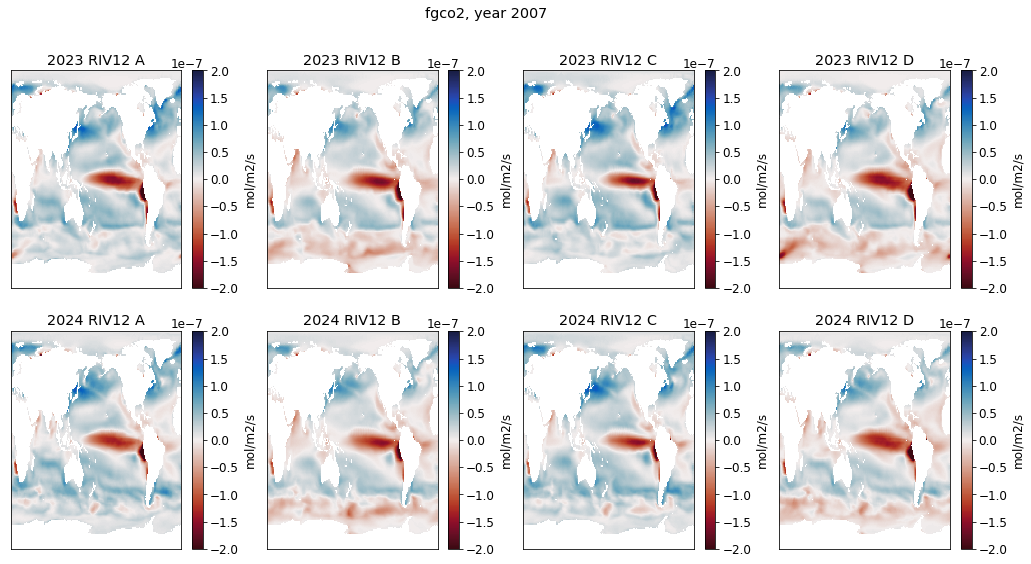

In [25]:
tvar = 'fgco2'
tcmap = cm.balance_r
tvmin = -2e-7; tvmax = 2e-7
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, False)

### VarID 8 (key flag 23): sfco2

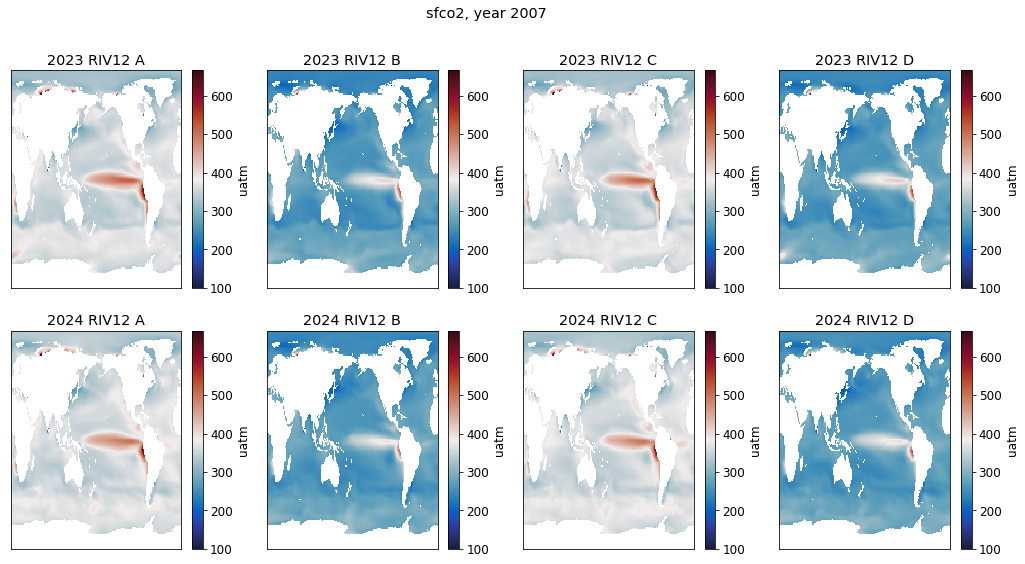

In [26]:
tvar = 'sfco2'
tcmap = cm.balance
tvmin = 0+100; tvmax = 382.99+382.99-100
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 9 (key flag 2): fice

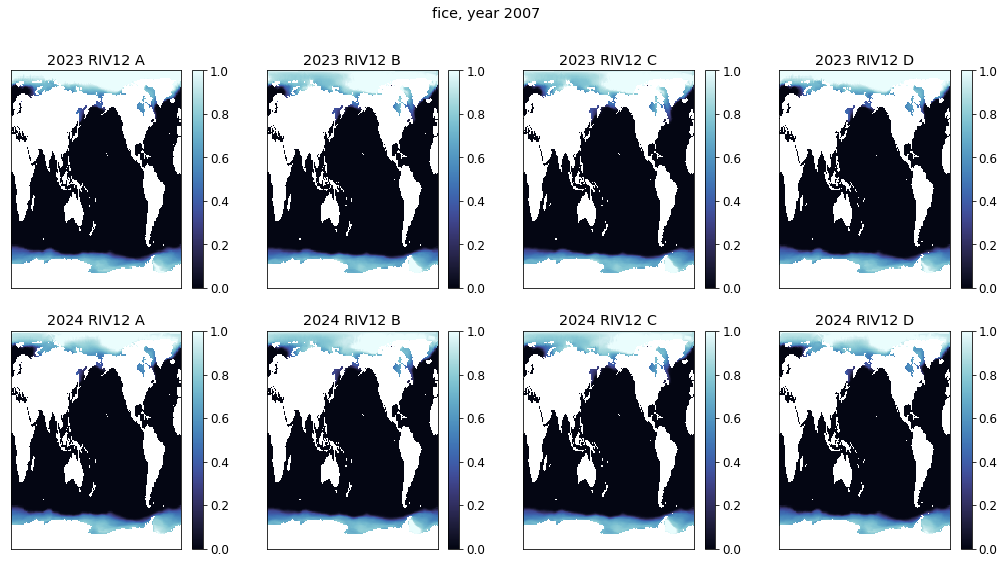

In [27]:
tvar = 'fice'
tcmap = cm.ice
tvmin = 0; tvmax = 1
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 10 (key flag 10): dissicos

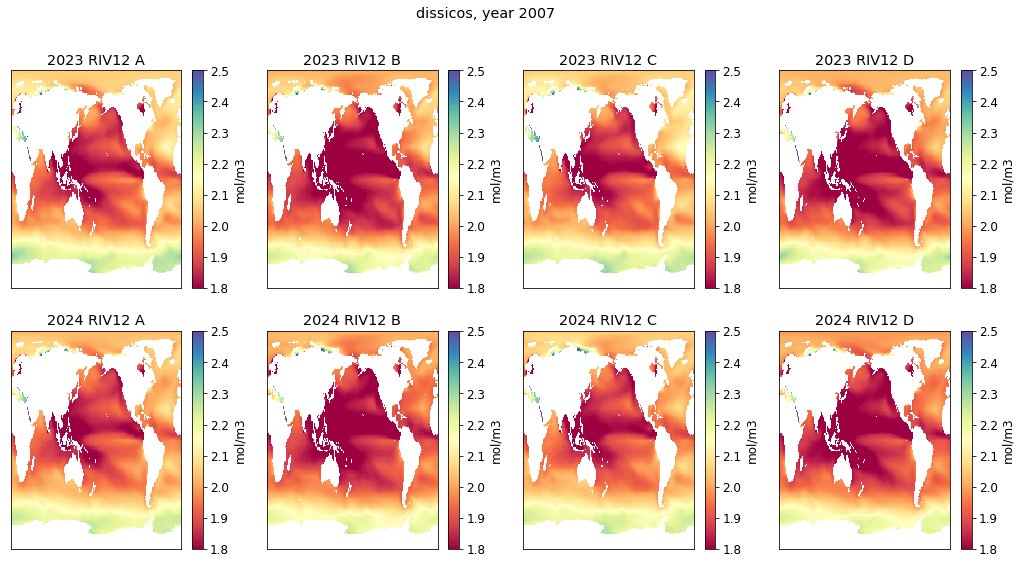

In [28]:
tvar = 'dissicos'
tcmap = 'Spectral'
tvmin = 1.8; tvmax = 2.5
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 11 (key flag 11): talkos

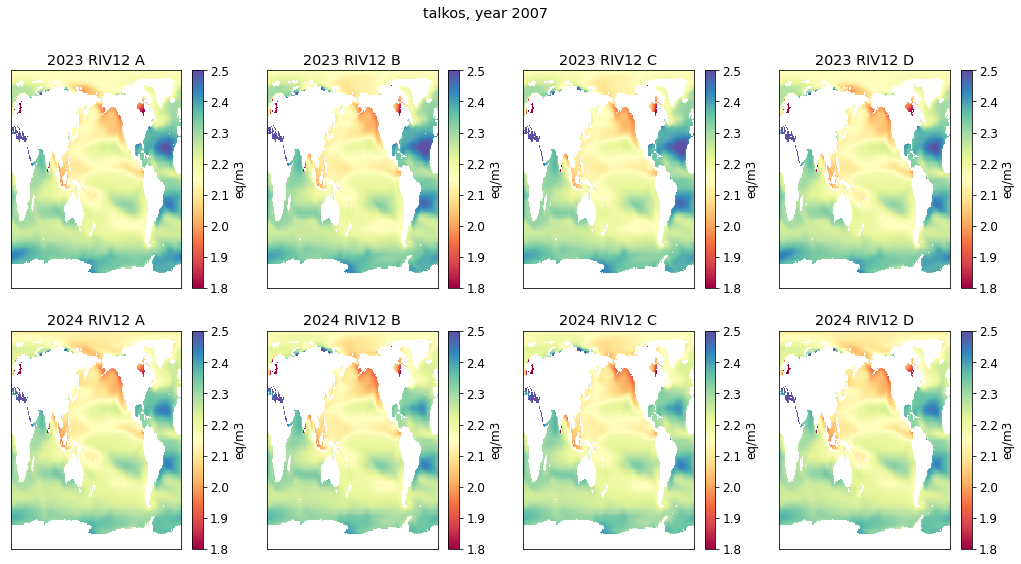

In [29]:
tvar = 'talkos'
tcmap = 'Spectral'
tvmin = 1.8; tvmax = 2.5
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 12 (key flag 8): tos

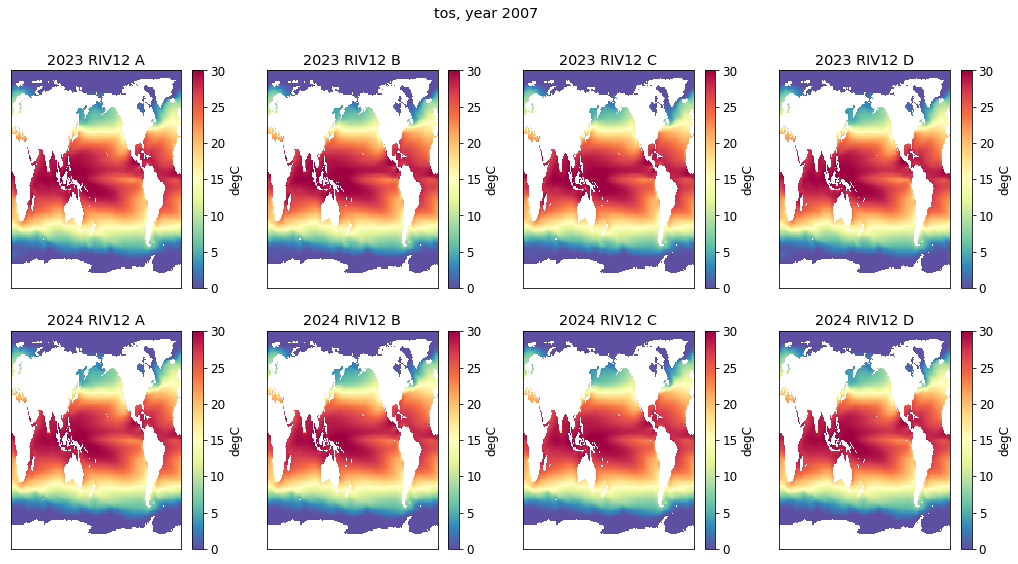

In [30]:
tvar = 'tos'
tcmap = 'Spectral_r'
tvmin = 0; tvmax =30
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 13 (key flag 9): sos

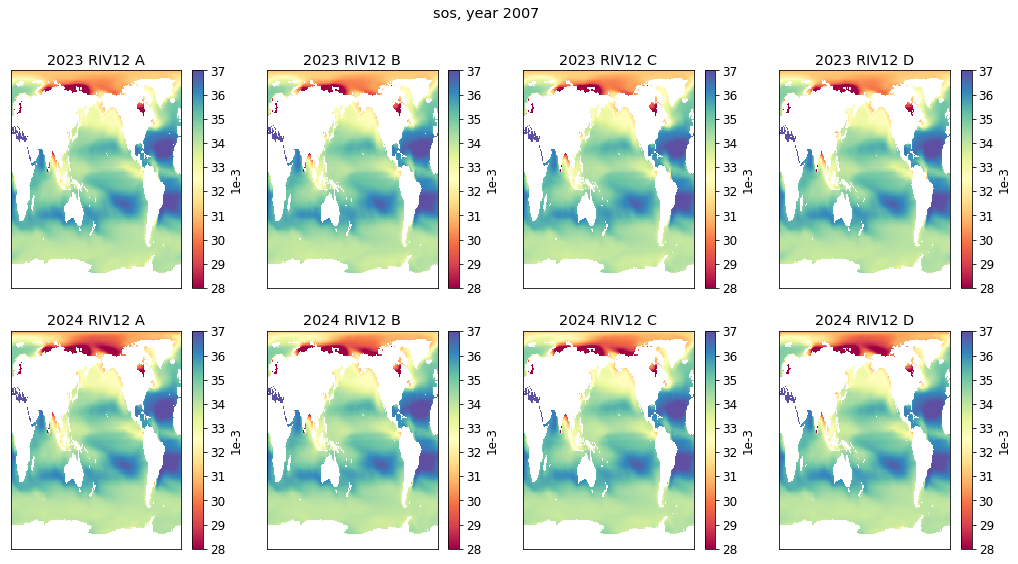

In [31]:
tvar = 'sos'
tcmap = 'Spectral'
tvmin = 28; tvmax = 37
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 14 (key flag 24): intdic 

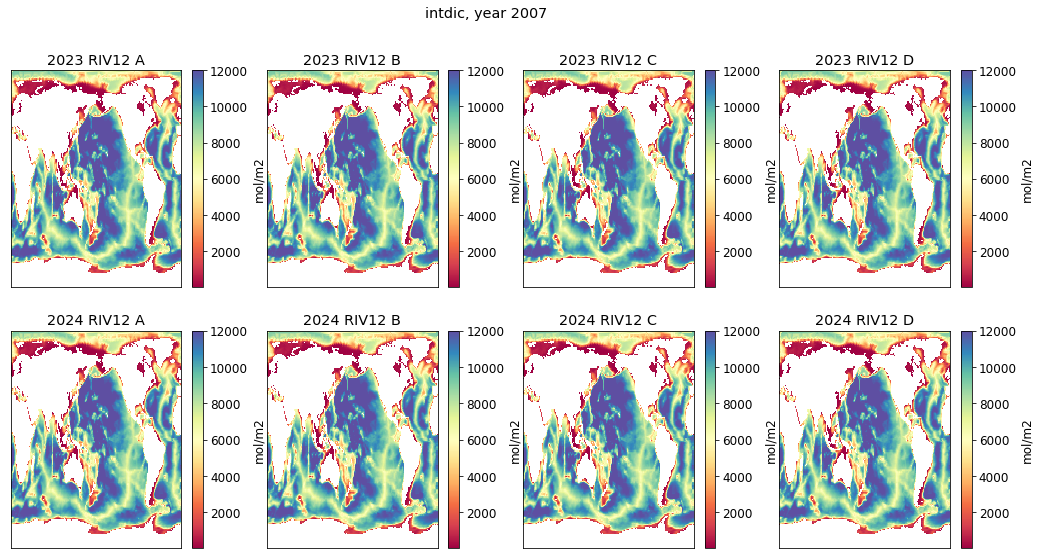

In [39]:
tvar = 'intdic'
tcmap = 'Spectral'
tvmin = 20; tvmax = 12000
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

## AMOC check-metrics

/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/


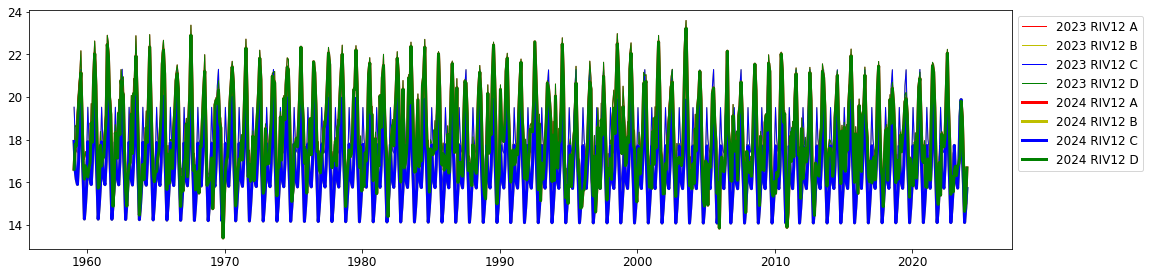

In [52]:
fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(16*fact, 4*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

TJ_A = xr.open_dataset(glob.glob(f'{TJdir}/AMOC*_A*.nc')[0])
TJ_B = xr.open_dataset(glob.glob(f'{TJdir}/AMOC*_B*.nc')[0])
TJ_C = xr.open_dataset(glob.glob(f'{TJdir}/AMOC*_C*.nc')[0])
TJ_D = xr.open_dataset(glob.glob(f'{TJdir}/AMOC*_D*.nc')[0])

TJ24_A = xr.open_dataset(glob.glob(f'{TJ24dir}/AMOC*_A*.nc')[0])
TJ24_B = xr.open_dataset(glob.glob(f'{TJ24dir}/AMOC*_B*.nc')[0])
TJ24_C = xr.open_dataset(glob.glob(f'{TJ24dir}/AMOC*_C*.nc')[0])
TJ24_D = xr.open_dataset(glob.glob(f'{TJ24dir}/AMOC*_D*.nc')[0])

axs.plot(TJ_A.TIME,TJ_A.AMOC, color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_B.AMOC, color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_C.AMOC, color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_D.AMOC, color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

axs.plot(TJ24_A.TIME,TJ24_A.AMOC, color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_B.AMOC, color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_C.AMOC, color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_D.AMOC, color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)
axs.legend(bbox_to_anchor = [1,1])

## SO_SSS check-metrics

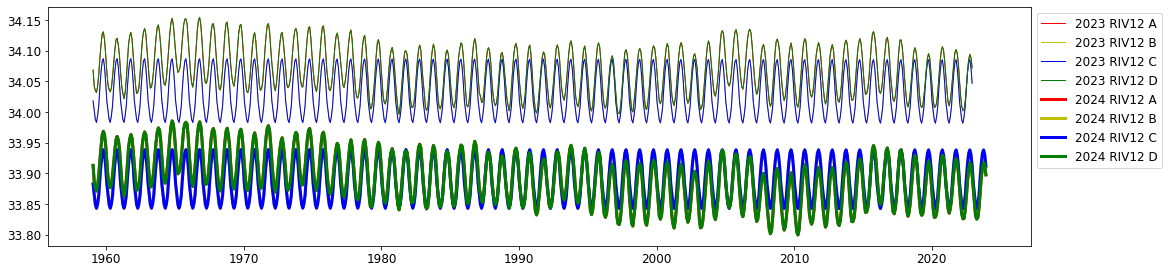

In [55]:
fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(16*fact, 4*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

TJ_A = xr.open_dataset(glob.glob(f'{TJdir}/SO_SSS*_A*.nc')[0])
TJ_B = xr.open_dataset(glob.glob(f'{TJdir}/SO_SSS*_B*.nc')[0])
TJ_C = xr.open_dataset(glob.glob(f'{TJdir}/SO_SSS*_C*.nc')[0])
TJ_D = xr.open_dataset(glob.glob(f'{TJdir}/SO_SSS*_D*.nc')[0])

TJ24_A = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SSS*_A*.nc')[0])
TJ24_B = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SSS*_B*.nc')[0])
TJ24_C = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SSS*_C*.nc')[0])
TJ24_D = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SSS*_D*.nc')[0])

axs.plot(TJ_A.TIME,TJ_A.SO_SSS, color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_B.SO_SSS, color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_C.SO_SSS, color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_D.SO_SSS, color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

axs.plot(TJ24_A.TIME,TJ24_A.SO_SSS, color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_B.SO_SSS, color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_C.SO_SSS, color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_D.SO_SSS, color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)
axs.legend(bbox_to_anchor = [1,1])

## SO_SI check-metrics

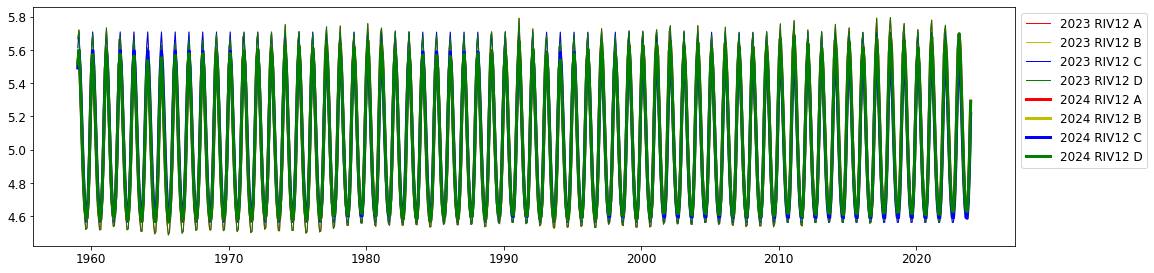

In [56]:
fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(16*fact, 4*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

TJ_A = xr.open_dataset(glob.glob(f'{TJdir}/SO_SI*_A*.nc')[0])
TJ_B = xr.open_dataset(glob.glob(f'{TJdir}/SO_SI*_B*.nc')[0])
TJ_C = xr.open_dataset(glob.glob(f'{TJdir}/SO_SI*_C*.nc')[0])
TJ_D = xr.open_dataset(glob.glob(f'{TJdir}/SO_SI*_D*.nc')[0])

TJ24_A = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SI*_A*.nc')[0])
TJ24_B = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SI*_B*.nc')[0])
TJ24_C = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SI*_C*.nc')[0])
TJ24_D = xr.open_dataset(glob.glob(f'{TJ24dir}/SO_SI*_D*.nc')[0])

axs.plot(TJ_A.TIME,TJ_A.SO_SI, color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_B.SO_SI, color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_C.SO_SI, color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
axs.plot(TJ_A.TIME,TJ_D.SO_SI, color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

axs.plot(TJ24_A.TIME,TJ24_A.SO_SI, color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_B.SO_SI, color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_C.SO_SI, color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
axs.plot(TJ24_A.TIME,TJ24_D.SO_SI, color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)
axs.legend(bbox_to_anchor = [1,1])

## Revelle check metrics

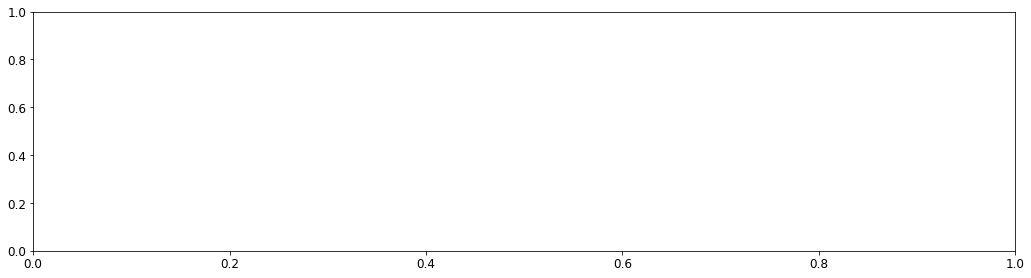

In [58]:
fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(16*fact, 4*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

TJ_A = xr.open_dataset(glob.glob(f'{TJdir}/Revelle*_A*.nc')[0])
TJ_B = xr.open_dataset(glob.glob(f'{TJdir}/Revelle*_B*.nc')[0])
TJ_C = xr.open_dataset(glob.glob(f'{TJdir}/Revelle*_C*.nc')[0])
TJ_D = xr.open_dataset(glob.glob(f'{TJdir}/Revelle*_D*.nc')[0])

TJ24_A = xr.open_dataset(glob.glob(f'{TJ24dir}/Revelle*_A*.nc')[0])
TJ24_B = xr.open_dataset(glob.glob(f'{TJ24dir}/Revelle*_B*.nc')[0])
TJ24_C = xr.open_dataset(glob.glob(f'{TJ24dir}/Revelle*_C*.nc')[0])
TJ24_D = xr.open_dataset(glob.glob(f'{TJ24dir}/Revelle*_D*.nc')[0])

# axs.plot(TJ_A.TIME,TJ_A.Revelle, color = 'r', label = '2023 RIV12 A', linestyle = '-', linewidth = 1)
# axs.plot(TJ_A.TIME,TJ_B.Revelle, color = 'y', label = '2023 RIV12 B', linestyle = '-', linewidth = 1)
# axs.plot(TJ_A.TIME,TJ_C.Revelle, color = 'b', label = '2023 RIV12 C', linestyle = '-', linewidth = 1)
# axs.plot(TJ_A.TIME,TJ_D.Revelle, color = 'g', label = '2023 RIV12 D', linestyle = '-', linewidth = 1)

# axs.plot(TJ24_A.TIME,TJ24_A.Revelle, color = 'r', label = '2024 RIV12 A', linestyle = '-', linewidth = 3)
# axs.plot(TJ24_A.TIME,TJ24_B.Revelle, color = 'y', label = '2024 RIV12 B', linestyle = '-', linewidth = 3)
# axs.plot(TJ24_A.TIME,TJ24_C.Revelle, color = 'b', label = '2024 RIV12 C', linestyle = '-', linewidth = 3)
# axs.plot(TJ24_A.TIME,TJ24_D.Revelle, color = 'g', label = '2024 RIV12 D', linestyle = '-', linewidth = 3)
# axs.legend(bbox_to_anchor = [1,1])

In [59]:
TJ_A

<xarray.Dataset>
Dimensions:    (LATITUDE: 180, LONGITUDE: 360, TIME: 768)
Coordinates:
  * TIME       (TIME) datetime64[ns] 1959-01-12 ... 2022-12-11T23:57:52
  * LATITUDE   (LATITUDE) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * LONGITUDE  (LONGITUDE) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
Data variables:
    RevelleF   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    made in:  /gpfs/data/greenocean/GCB/GCB2023/scripts/makeRevelle.ipynb